In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_csv('IRIS-flower.csv')

In [3]:
df.shape

(150, 5)

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
43,5.0,3.5,1.6,0.6,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
62,6.0,2.2,4.0,1.0,Iris-versicolor
89,5.5,2.5,4.0,1.3,Iris-versicolor
13,4.3,3.0,1.1,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica
127,6.1,3.0,4.9,1.8,Iris-virginica
61,5.9,3.0,4.2,1.5,Iris-versicolor
26,5.0,3.4,1.6,0.4,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Reducing the size of our dataframe

In [7]:
df['species']=df['species'].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


# Checking for null values

In [9]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Checking for duplicate values

In [10]:
df.duplicated().sum()

3

In [11]:
df = df.drop_duplicates()

# Mathematical representation of our data

In [12]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Checking for outliers in each numerical columns

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_length'>

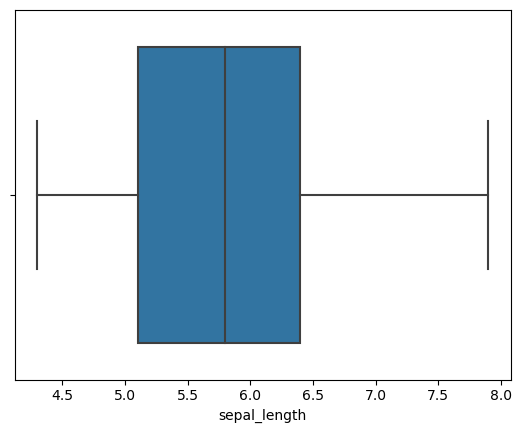

In [13]:
sns.boxplot(df['sepal_length'])

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_width'>

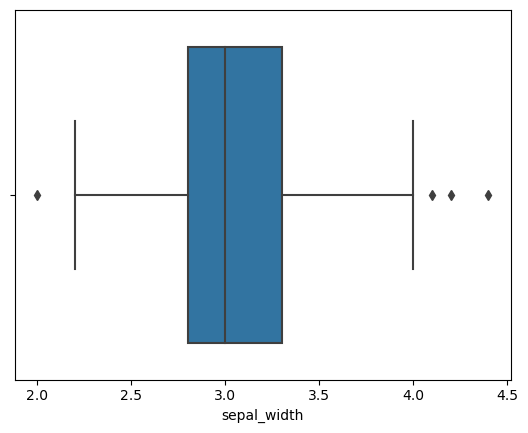

In [14]:
sns.boxplot(df['sepal_width'])

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='petal_length'>

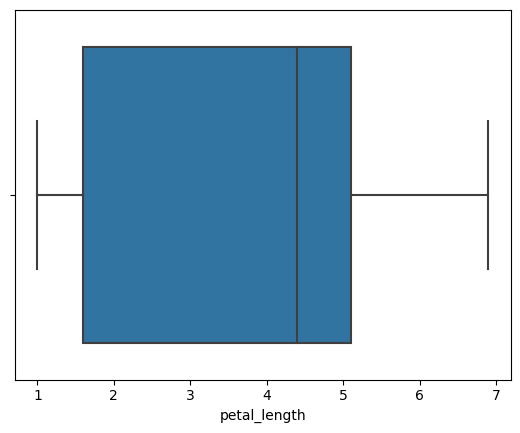

In [15]:
sns.boxplot(df['petal_length'])

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='petal_width'>

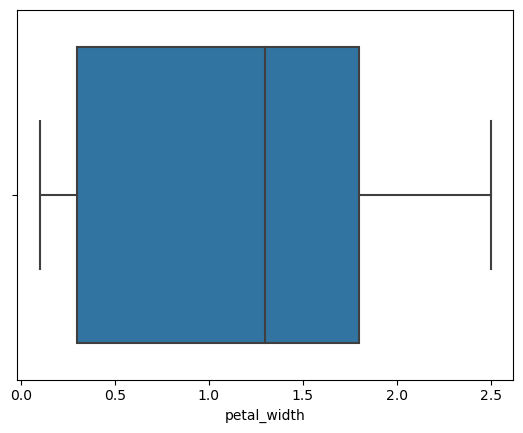

In [16]:
sns.boxplot(df['petal_width'])

# Removing outliers from sepal width column

In [17]:
data1 = df[df['sepal_width']>4.0]

In [18]:
data2 = df[df['sepal_width']<2.1]

In [19]:
df1 = df.drop(data1.index)

In [20]:
df2 = df1.drop(data2.index)

In [21]:
df2.shape

(143, 5)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_width'>

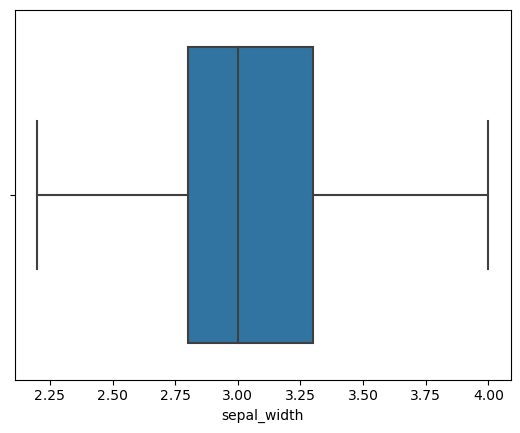

In [22]:
sns.boxplot(df2['sepal_width'])

# Checking for outliers in each column of particular species

array([[<AxesSubplot:title={'center':'petal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'petal_width'}, xlabel='[species]'>],
       [<AxesSubplot:title={'center':'sepal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

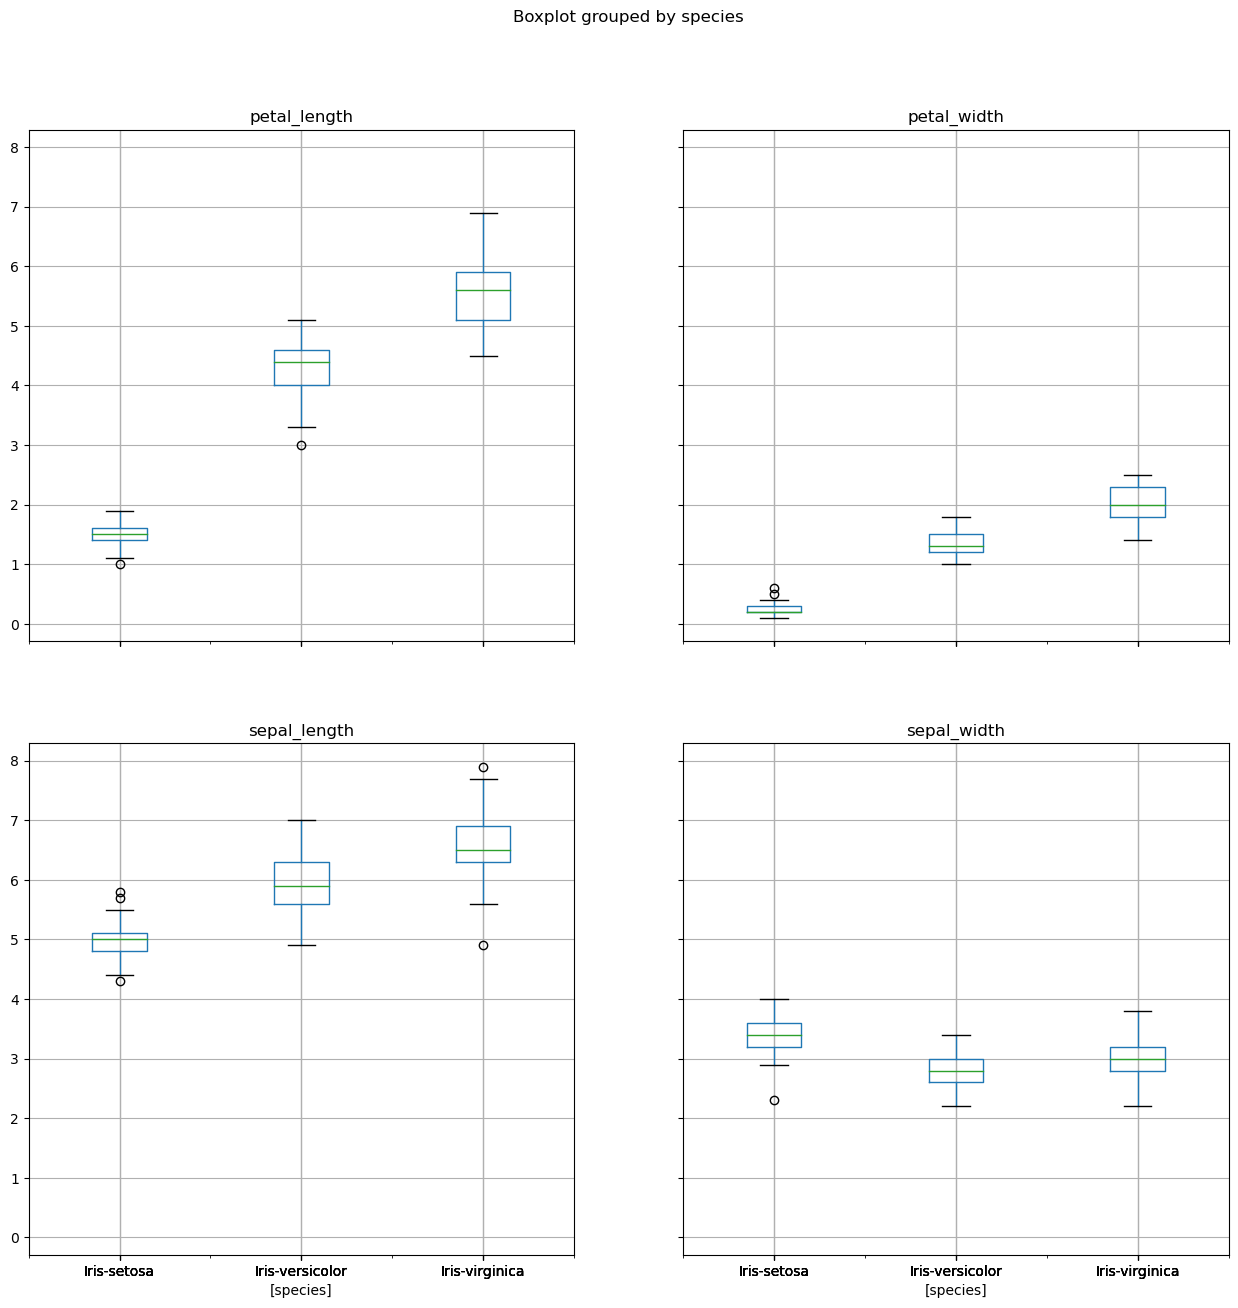

In [23]:
df2.boxplot(by="species",figsize=(15,15))

# Removing outliers in each column of particular species

In [24]:
data3=df2[df2['species']=='Iris-virginica']
data4 = data3[data3['sepal_length']==4.9]
df2 = df2.drop(data4.index)

In [25]:
data5=df2[df2['species']=='Iris-setosa']
data6=data5[data5['sepal_length']>5.6]
df2 = df2.drop(data6.index)

In [26]:
data7=df2[df2['species']=='Iris-setosa']
data8=data7[data7['sepal_width']<2.50]
df2 = df2.drop(data8.index)

In [27]:
data9=df2[df2['species']=='Iris-setosa']
data10=data9[data9['petal_length']<1.2]
df2 = df2.drop(data10.index)

data11=df2[df2['species']=='Iris-versicolor']
data12=data11[data11['petal_length']<=3]
df2 = df2.drop(data12.index)

In [28]:
data13=df2[df2['species']=='Iris-setosa']
data14=data13[data13['petal_width']>=0.5]
df2 = df2.drop(data14.index)

# skewness

In [29]:
df2.skew()

C:\Users\Hp\AppData\Local\Temp\ipykernel_2172\834593052.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2.skew()


sepal_length    0.220600
sepal_width     0.106454
petal_length   -0.461502
petal_width    -0.253030
dtype: float64

# Exploratory Data Analysis

# Piechart

<AxesSubplot:ylabel='species'>

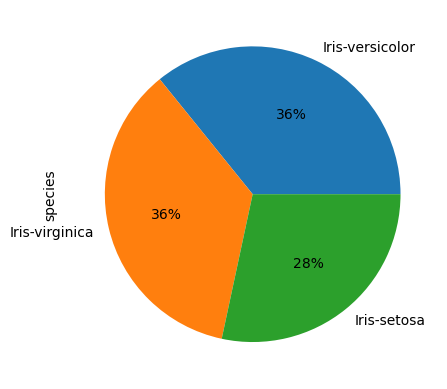

In [30]:
df2['species'].value_counts().plot(kind='pie',autopct='%.0f%%')

# Pairplot

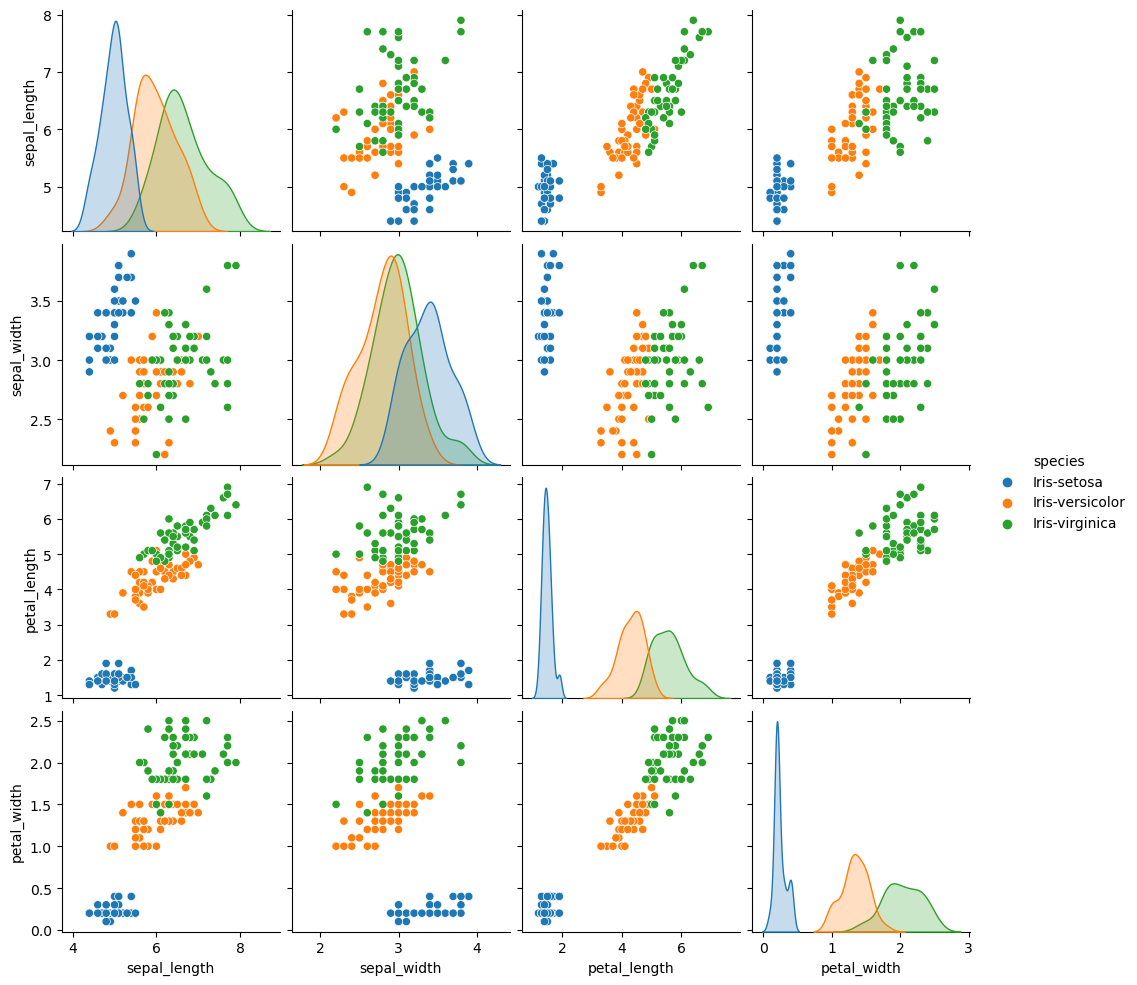

In [31]:
sns.pairplot(df2,hue='species')

# Histogram

array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

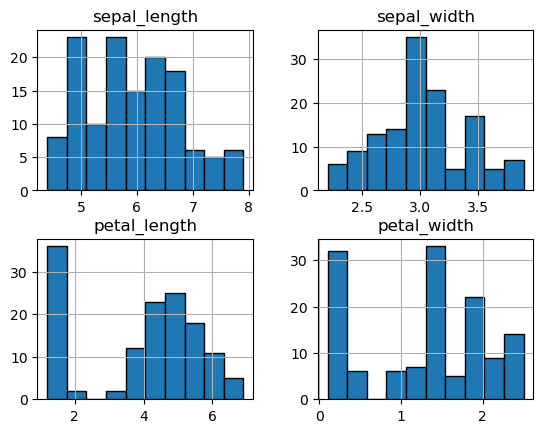

In [32]:
df2.hist(edgecolor='black')

# Checking the correlation between the columns

<AxesSubplot:>

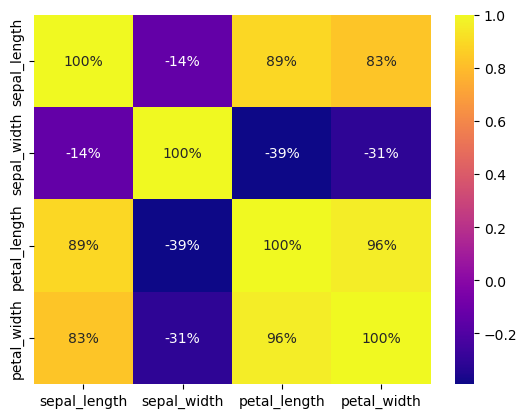

In [33]:
sns.heatmap(df2.corr(),annot=True,fmt=".0%",cmap='plasma')

# Boxplot

array([[<AxesSubplot:title={'center':'petal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'petal_width'}, xlabel='[species]'>],
       [<AxesSubplot:title={'center':'sepal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

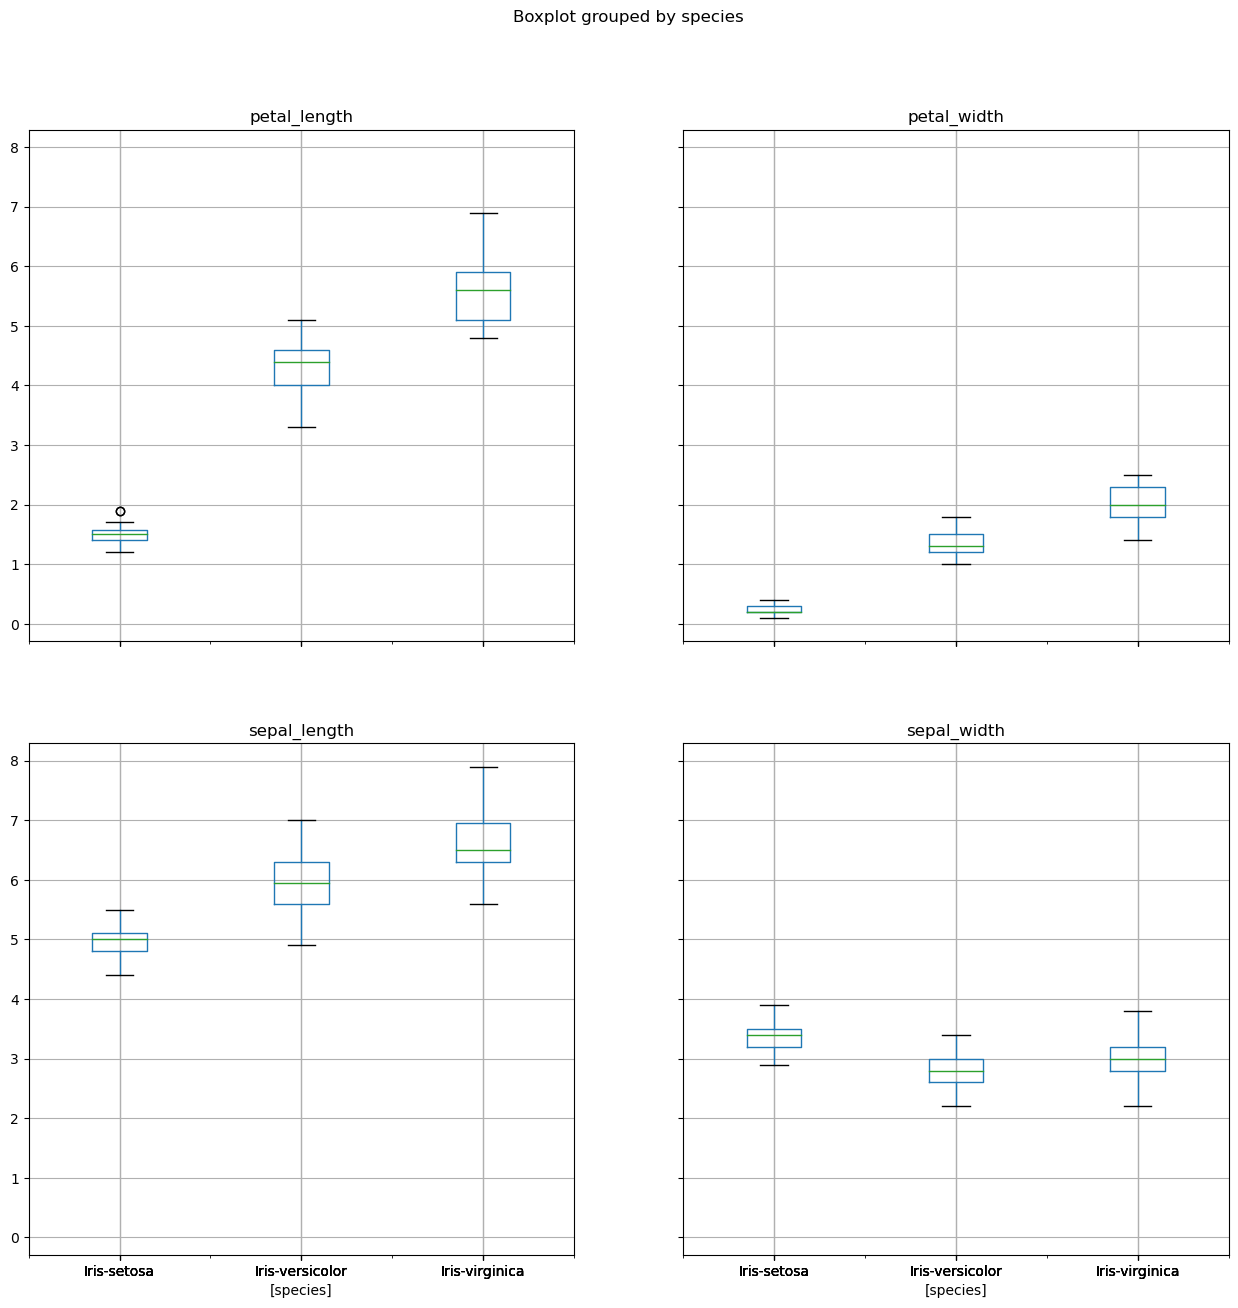

In [34]:
df2.boxplot(by="species",figsize=(15,15))

# Splitting our data into training and testing dataset

In [35]:
X = df2.iloc[:,:-1] # Input columns
Y = df2['species']  # output column

In [36]:
X.sample(10)

,sepal_length,sepal_width,petal_length,petal_width
42,4.4,3.2,1.3,0.2
146,6.3,2.5,5.0,1.9
139,6.9,3.1,5.4,2.1
70,5.9,3.2,4.8,1.8
124,6.7,3.3,5.7,2.1
46,5.1,3.8,1.6,0.2
125,7.2,3.2,6.0,1.8
39,5.1,3.4,1.5,0.2
3,4.6,3.1,1.5,0.2
74,6.4,2.9,4.3,1.3


In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

In [38]:
X_test.shape

(14, 4)

In [39]:
X_train.shape

(120, 4)

In [40]:
Y_test.shape

(14,)

In [41]:
Y_train.shape

(120,)

# Scaling

In [42]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()  # object of class StandardScaler

In [49]:
X_train = scaler.fit_transform(X_train)

In [50]:
X_test = scaler.transform(X_test)

# Model Training 

In [ ]:
clf = LogisticRegression()

In [52]:
clf.fit(X_train,Y_train)

LogisticRegression()

# Model Evaluation

In [58]:
Y_pred = clf.predict(X_test)

In [59]:
Y_test

80     Iris-versicolor
50     Iris-versicolor
29         Iris-setosa
101     Iris-virginica
90     Iris-versicolor
49         Iris-setosa
117     Iris-virginica
65     Iris-versicolor
134     Iris-virginica
5          Iris-setosa
124     Iris-virginica
75     Iris-versicolor
144     Iris-virginica
36         Iris-setosa
Name: species, dtype: category
Categories (3, object): ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [65]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [67]:
Accuracy = accuracy_score(Y_test,Y_pred)
class_report = classification_report(Y_test,Y_pred)

In [69]:
print("Accuracy =",Accuracy)

Accuracy = 0.9285714285714286


In [70]:
print("classification report")
print(class_report)

classification report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         4
Iris-versicolor       0.83      1.00      0.91         5
 Iris-virginica       1.00      0.80      0.89         5

       accuracy                           0.93        14
      macro avg       0.94      0.93      0.93        14
   weighted avg       0.94      0.93      0.93        14

